<a href="https://colab.research.google.com/github/bravodelta/corp-speak-detector/blob/master/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![MNIST says hello](https://cdn-images-1.medium.com/max/1000/0*gu9GS95owPIskKlE)


# Hello, World 
---

This notebook is "Hello, World" of Deep Learning

## 1. Import Packages

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


## 2. Load MNIST Dataset

In [0]:
batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step


## 3. Define Deep Learning  Model
![Neural Network for identifying handwritten digits](https://cdn-images-1.medium.com/max/1000/0*RjmTPTB72cnWrjwb)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

## 4. Train The Model

In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('\n########################################\n#   T E S T    A C C U R A C Y:', score[1]*100, "%\n########################################")


########################################
#   T E S T    A C C U R A C Y: 97.97 %
########################################


## 5. Display !

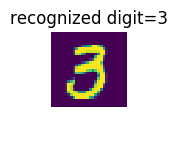

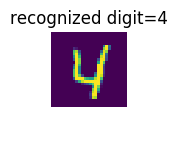

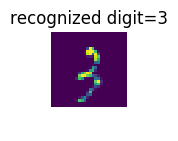

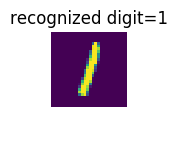

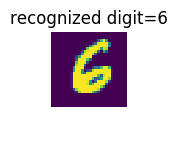

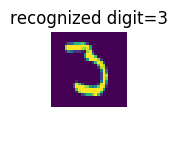

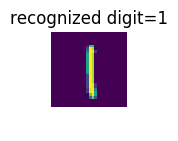

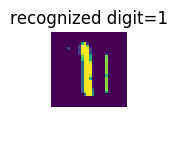

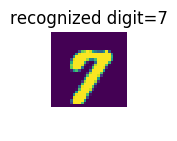

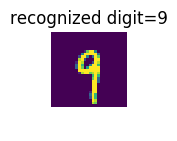

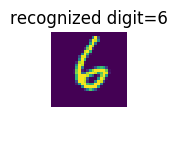

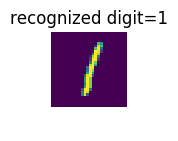

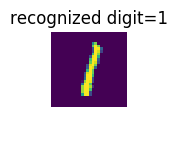

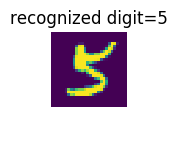

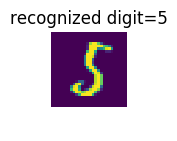

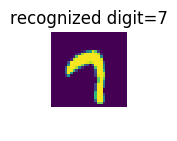

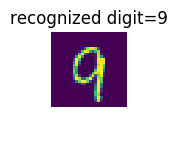

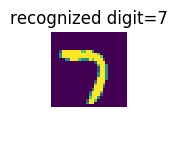

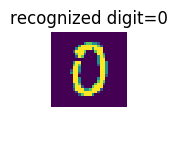

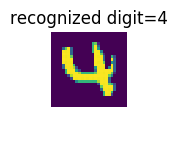

In [0]:
from matplotlib import pyplot as plt
import random

for x in range(20):
  img = x_test[random.randint(1,x_test.shape[0])]
  img_class = model.predict_classes(img.reshape(1,img_rows,img_cols,1))
  img = img.reshape((img_rows, img_cols))
  fig=plt.figure(figsize=(1,1), dpi=100, facecolor='w', edgecolor='k')
  plt.axis('off')
  plt.imshow(img)
  plt.title("recognized digit=" + str(img_class[0]))
  plt.show()